# Task 1
Data Cleaning & Preprocessing

 1.Import the dataset and explore basic info (nu ls, data types).

 2.Handle missing values using mean/median/imputation.

 3.Convert categorical features into numerical using encoding.

 4.Normalize/standardize the numerical features.

 5.Visualize outliers using boxplots and remove them.

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Data Loading

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (891, 12)


# Display some basic information.

In [4]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [5]:
missing_values = df.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Text(0.5, 1.0, 'Missing Values')

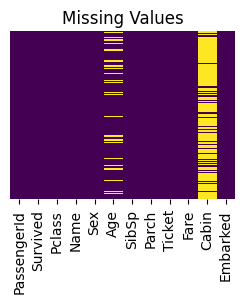

In [6]:
plt.subplot(2, 2, 2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values')

In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-7-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [8]:
df.drop('Cabin', axis=1, inplace=True)

In [9]:
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

In [10]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Text(0.5, 1.0, 'Missing Values')

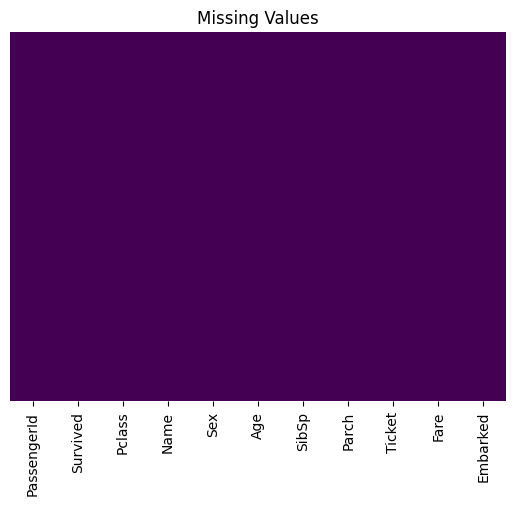

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values')

# Encoding

In [12]:
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,PassengerId,Survived,Name,Age,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Feature Scaling

In [13]:
numerical_features = ['Age', 'Fare']
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])
display(df.head())

print(f"MinMaxScaler used to normalize features: {numerical_features}")

,PassengerId,Survived,Name,Age,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,"Braund, Mr. Owen Harris",0.271174,A/5 21171,0.014151,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.472229,PC 17599,0.139136,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",0.321438,STON/O2. 3101282,0.015469,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.434531,113803,0.103644,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,"Allen, Mr. William Henry",0.434531,373450,0.015713,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


MinMaxScaler used to normalize features: ['Age', 'Fare']


# Visualize the Data

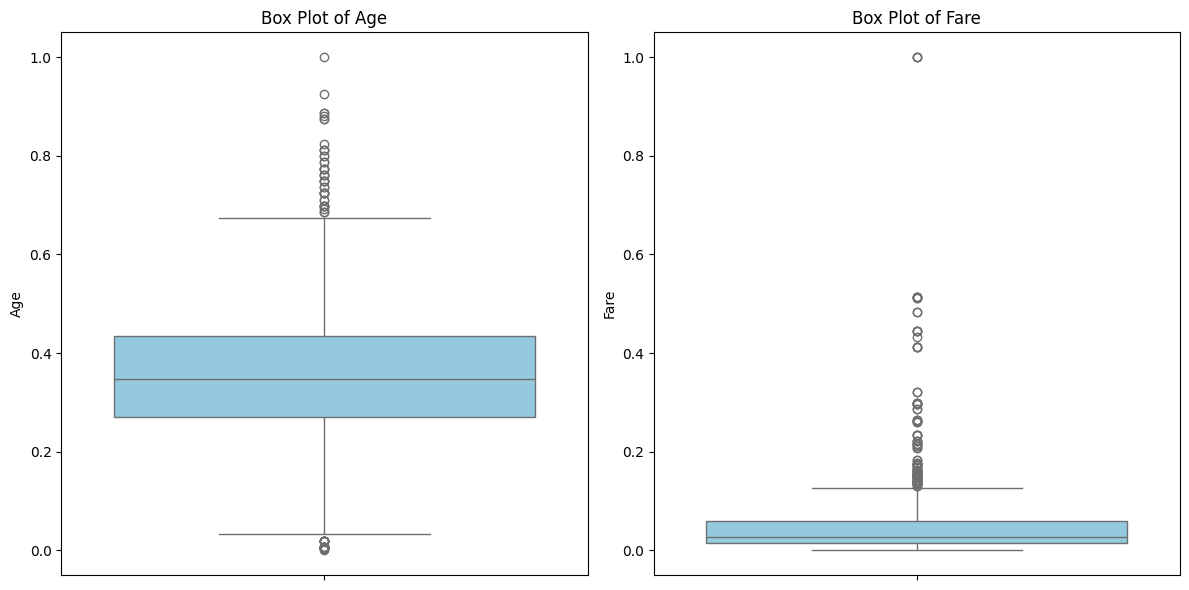

In [14]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
    plt.xlabel('')

plt.tight_layout()
plt.show()

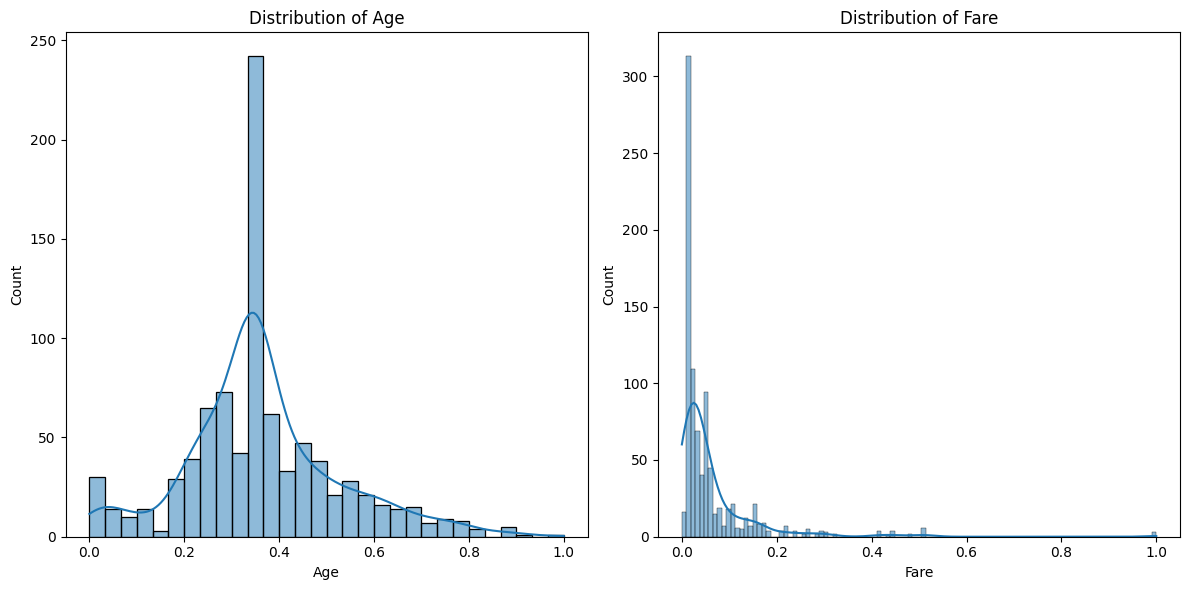

In [15]:
numerical_features = ['Age', 'Fare']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [19]:
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age


Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

print("Shape before outlier removal:", df.shape)

df_filtered = df[~((df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age) |
                   (df['Fare'] < lower_bound_fare) | (df['Fare'] > upper_bound_fare))]


df = df_filtered

print("Shape after outlier removal:", df.shape)

Shape before outlier removal: (891, 23)
Shape after outlier removal: (721, 23)
